# Project 2 - Samantha Hoang

## Scientific Question: Is it possible to visually identify between the American Alligator and the American Crocodile quickly?

The American Alligator and American Crocodile have long been misidentified by non-experts due to their incredibly similar physical appearance. There are fifteen species within the Crocodylidae family and eight species within the Alligatoridae family, but we will focus on the American species of both the Alligator and Crocodile for today. 

According to the Everglades Holiday Park in Florida, the easiest features to focus on in distinguishing between the Alligator and the Crocodile is snout shape and jawline. "Alligators have a wide, rounded, u-shaped snout, while crocodiles have long, pointed, v-shaped snouts." Also in regards to their jawlines, "Alligators have a wide upper jaw, which allows for the teeth to remain hidden in the mouth." And for Crocodiles, "both upper and lower jaws are the same size, exposing their teeth as they interlock, creating the look of a toothy grin." (Everglades Holiday Park, 2020, https://www.evergladesholidaypark.com/alligators-and-crocodiles/#:~:text=Snout%20Shape%3A%20Alligators%20have%20a,pointed%2C%20v%2Dshaped%20snouts.&text=Crocodiles%20are%20different%20from%20alligators,look%20of%20a%20toothy%20grin.)

The database used for this project is derived from https://www.inaturalist.org/, an image gallery and informative website dedicated to collecting observations and providing a platform for naturalists to discuss findings. Images are classified voluntarily by experts and enthusiasts with a set of checks and balances to ensure image classification quality. Two hundred images of the American Alligator and another two hundred images of the American Crocodile were obtained and downloaded to a collective database. In total there are four hundred images. The images can be found at this link: https://drive.google.com/drive/folders/1STqrl1SqPyngqcwTH-zEvm_5_JXBoOjK?usp=sharing.

## Scientific Hypothesis: If there are defining features to the head shape appearance between the American Alligator and the American Crocodile, then their images can be classified in an automated process.

The database https://www.inaturalist.org/ had hundreds of images of both the American Alligator and Crocodile, but only two hundred of each were used in this experiment. They were downloaded as .jpeg files for compatability with the deep neural network model. The model is trained with these image datasets and starts to associate certain features to the appropriate class. Once trained, we are able to test the model using random shuffles of the image dataset and see the accuracy and validation scores. Collectively, the information is stored and plotted to compare its classification efficiency using matplotlib.

## Part 1: Load the Packages

Packages loaded include the following:

- os: Provides the function to create directories/folders to store the images and to split the number of images that will be used to train the models.

- zipfile: An unzipping method to unzip the the zip file containing the image data sets. 

- random: Generating random shuffles of the dataset to test the model.

- tensorflow: The foundation of the deep learning model and is the main package for the keras sequential model where the convolutional neural network is formed.

- RMSprop: A gradient based optimization technique that is used in training the neural network.

- ImageDataGenerator: Generates batches of image data for each epoch.

- copyfile: Used to copy contents of the source file to the destination file.

- matplotlib: Used for the data visualization of the accuracies and losses in the results.

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib

## Part 2: Downloading the Dataset and Extracting ZIP Files

The image dataset can be found here on Google Drive by this link: https://drive.google.com/drive/folders/1STqrl1SqPyngqcwTH-zEvm_5_JXBoOjK?usp=sharing. Download each dataset to your local machine. In the end you should have a folder containing Alligator images and another containing Crocodile images. 

In [2]:
# Make additional directories to separate the alligators and crocodiles.
try:
    os.mkdir('reptile_data')
    os.mkdir('reptile_data/alligators')
    os.mkdir('reptile_data/crocodiles')
except OSError:
    pass

These new directories will appear in the Juypter Notebook main directory. There should be a new folder made called "reptile_data". From here, manually input the images into their respective folders. Alligator images will be placed in reptile_data/alligators and Crocodile images will be placed in reptile_data/crocodiles. You may need to press upload for each photo.

In [3]:
# len will give the folder a numerical value based on its contents and os.listdir will pull up the file in question.
print(len(os.listdir('reptile_data/alligators')))
print(len(os.listdir('reptile_data/crocodiles')))

# Expected Output: 200 each

200
200


New directories are made to allow data to be stored in a specific place for training and testing.

In [4]:
try:
    os.mkdir('reptile_data/alligators-v-crocodiles')
    os.mkdir('reptile_data/alligators-v-crocodiles/training')
    os.mkdir('reptile_data/alligators-v-crocodiles/testing')
    os.mkdir('reptile_data/alligators-v-crocodiles/training/alligators')
    os.mkdir('reptile_data/alligators-v-crocodiles/training/crocodiles')
    os.mkdir('reptile_data/alligators-v-crocodiles/testing/alligators')
    os.mkdir('reptile_data/alligators-v-crocodiles/testing/crocodiles')
except OSError:
    pass

## Part 3: Prepare the Data for Training and Testing

The data needs to be split into training and testing sets in order to effectively train the model. 

In [5]:
# Split the data from the source into the different directories previously created.
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


ALLIGATORS_SOURCE_DIR = "reptile_data/alligators/"
TRAINING_ALLIGATORS_DIR = "reptile_data/alligators-v-crocodiles/training/alligators/"
TESTING_ALLIGATORS_DIR = "reptile_data/alligators-v-crocodiles/testing/alligators/"
CROCODILES_SOURCE_DIR = "reptile_data/crocodiles/"
TRAINING_CROCODILES_DIR = "reptile_data/alligators-v-crocodiles/training/crocodiles/"
TESTING_CROCODILES_DIR = "reptile_data/alligators-v-crocodiles/testing/crocodiles/"

split_size = .9
split_data(ALLIGATORS_SOURCE_DIR, TRAINING_ALLIGATORS_DIR, TESTING_ALLIGATORS_DIR, split_size)
split_data(CROCODILES_SOURCE_DIR, TRAINING_CROCODILES_DIR, TESTING_CROCODILES_DIR, split_size)

In [6]:
# Check the directories afterwards to ensure that the proper amount of training and testing images were split where training images outnumber testing images.
print(len(os.listdir('reptile_data/alligators-v-crocodiles/training/alligators/')))
print(len(os.listdir('reptile_data/alligators-v-crocodiles/training/crocodiles/')))
print(len(os.listdir('reptile_data/alligators-v-crocodiles/testing/alligators/')))
print(len(os.listdir('reptile_data/alligators-v-crocodiles/testing/crocodiles/')))

# Expected output:
# 180
# 180
# 20
# 20

180
180
20
20


## Part 4: Model Training and Testing

The model is now trained using Keras Sequential Model which condenses the images by maxpooling and condensing image size and pixel density. The model is then placed under certain parameters such as batch_size, class_mode, and target_size which will be used in training. The model is trained using the keras function model.fit with 15 epochs. Using matplotlib, the output of the different epochs will be plotted comparing validation accuracy with training accuracy and validation loss with training loss.

In [7]:
# Using keras sequential moel, the convolutional neural network is formed. 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [8]:
# Training and validation parameters are set with batch_size = 10, class_mode = 'binary', and target_size = (150, 150).
TRAINING_DIR = "reptile_data/alligators-v-crocodiles/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "reptile_data/alligators-v-crocodiles/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=10,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
                                                              
# Expected Output:
# Found 360 images belonging to 2 classes.
# Found 40 images belonging to 2 classes.

Found 360 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [9]:
# The model is then trained by running 15 epochs and the training and validation accuracies and losses are recorded.
history = model.fit(train_generator, epochs=15, steps_per_epoch=len(TRAINING_DIR)//10,
                    validation_data=validation_generator, validation_steps=len(VALIDATION_DIR)//10)

Epoch 1/15
4/4 [==============================] - 5s 933ms/step - loss: 4.5023 - acc: 0.5250 - val_loss: 0.7566 - val_acc: 0.5000
Epoch 2/15
4/4 [==============================] - 3s 762ms/step - loss: 0.9987 - acc: 0.4250 - val_loss: 0.7491 - val_acc: 0.5000
Epoch 3/15
4/4 [==============================] - 2s 604ms/step - loss: 0.7401 - acc: 0.4750 - val_loss: 0.7036 - val_acc: 0.5000
Epoch 4/15
4/4 [==============================] - 3s 829ms/step - loss: 0.7643 - acc: 0.4500 - val_loss: 0.6841 - val_acc: 0.5500
Epoch 5/15
4/4 [==============================] - 3s 744ms/step - loss: 0.7233 - acc: 0.4750 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 6/15
4/4 [==============================] - 2s 587ms/step - loss: 0.7031 - acc: 0.5750 - val_loss: 0.8689 - val_acc: 0.5000
Epoch 7/15
4/4 [==============================] - 2s 581ms/step - loss: 0.7035 - acc: 0.5250 - val_loss: 0.6777 - val_acc: 0.5500
Epoch 8/15
4/4 [==============================] - 3s 678ms/step - loss: 0.6356 - acc: 0.57

<Figure size 432x288 with 0 Axes>

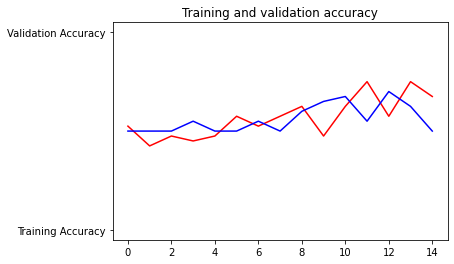

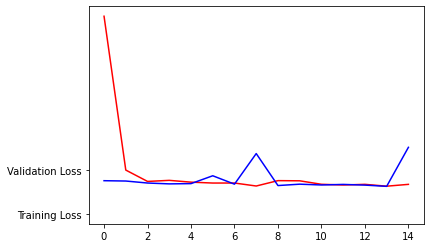

<Figure size 432x288 with 0 Axes>

In [10]:
# The graphs are then generated.
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# The list of lists are retrieved of the training and test data sets in each training epoch.
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

# The training and validation accuracy of each epoch is plotted.
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# The training and validation loss of each epoch is plotted.
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

## Part 6: Analysis of the Results

The plots above show that the model does not have a significant ability to distinguish between the American Alligator and American Crocodile. The similarities in both snout shape and jawline prove to be indistinguishable to the model when the model was trained and tested based on the image dataset. The average training accuracy resulted as about 0.57, or 57% and the average validation accuracy as 0.56, or 56%. The average training loss is about 0.973 and the average validation loss is 0.797. Since the accuracies are quite far from 1, or 100% and the losses are quite large, the experiment was unsuccessful in proving the hypothesis. Errors that could have occurred and should be considered for future experimentation would be the following:
- Lack of images: Image sets that are in the thousands are more suited for this process to work. 
- Poor image quality: The specimen position and photo quality needs to be clear enough to find defining features. Since the species used are large and hard to photo, the images from iNaturalist are sometimes not good quality and poorly positioned. Even with thorough screening, images with perfect head position and close range are hard to come by.